Mi chiedeva due paccetti come requisiti: netCDF4 e h5netcdf

In [16]:
pip install netCDF4

     ---------------------------------------- 0.0/6.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/6.6 MB 1.7 MB/s eta 0:00:04
     ---------------------------------------- 0.1/6.6 MB 787.7 kB/s eta 0:00:09
      --------------------------------------- 0.1/6.6 MB 726.2 kB/s eta 0:00:09
      --------------------------------------- 0.1/6.6 MB 599.1 kB/s eta 0:00:11
      --------------------------------------- 0.2/6.6 MB 510.2 kB/s eta 0:00:13
     - -------------------------------------- 0.2/6.6 MB 512.0 kB/s eta 0:00:13
     - -------------------------------------- 0.2/6.6 MB 479.2 kB/s eta 0:00:14
     - -------------------------------------- 0.2/6.6 MB 464.5 kB/s eta 0:00:14
     - -------------------------------------- 0.2/6.6 MB 464.5 kB/s eta 0:00:14
     - -------------------------------------- 0.2/6.6 MB 464.5 kB/s eta 0:00:14
     - -------------------------------------- 0.3/6.6 MB 441.9 kB/s eta 0:00:15
     - -------------------------------------- 0.3/6

In [20]:
pip install h5netcdf


     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
      --------------------------------------- 0.0/2.6 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.6 MB 1.1 MB/s eta 0:00:03
     - -------------------------------------- 0.1/2.6 MB 744.7 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/2.6 MB 752.9 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/2.6 MB 692.9 kB/s eta 0:00:04
     --- ------------------------------------ 0.2/2.6 MB 653.6 kB/s eta 0:00:04
     --- ------------------------------------ 0.3/2.6 MB 655.4 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/2.6 MB 654.1 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/2.6 MB 654.1 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/2.6 MB 654.1 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/2.6 MB 654.1 kB/s 

In [1]:
import numpy as np
import geopandas
import rioxarray
import xarray as xr
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import numpy.ma as ma
import datetime
from matplotlib import image as im
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import pandas as pd
import packaging
import netCDF4 
import h5netcdf

In [38]:
#function to move from 0+360 to -180+180 long
def ds_swaplon(ds):
    return ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

In [4]:
#apro 1° ds di CO2 total column per mese di jan dal 1979 al 2021 e plotto  grafico media spaziale
path= "./nc_files/CO2/cams73_latest_co2_col_surface_inst_{}01.nc"
CO2=np.zeros([42,1])
time=np.arange(1979,2021,1)
i=1979
j=0
while i<2021:
    dataset=xr.open_dataset(path.format(i))
    datarray_CO2=dataset.XCO2
    agg=np.array(datarray_CO2)
    av=np.average(agg)
    CO2[j]=av
    
    i=i+1
    j=j+1

CO2=CO2*28.97 / 44.01 * 1e6

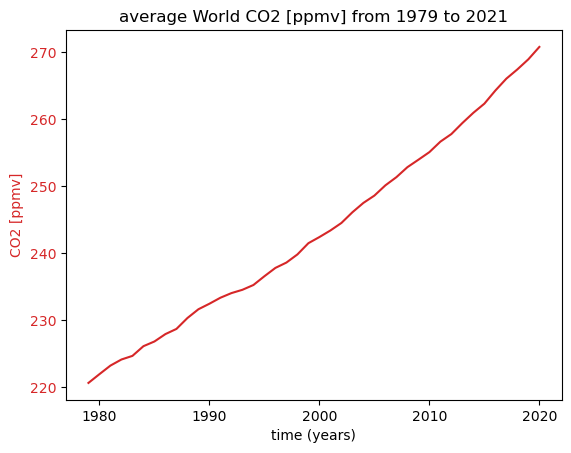

In [5]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (years)')
ax1.set_ylabel('CO2 [ppmv]', color=color)
ax1.set_title('average World CO2 [ppmv] from 1979 to 2021')
ax1.plot(time, CO2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

In [10]:
dataset=xr.open_dataset("./CO2flux/cams73_latest_co2_flux_surface_mm_198201.nc")
path= "./CO2flux/cams73_latest_co2_flux_surface_mm_{}.nc"
i=198201
dataset=xr.open_dataset(path.format(i))
dataset

<xarray.Dataset>
Dimensions:          (longitude: 96, latitude: 96)
Coordinates:
  * longitude        (longitude) float64 -180.0 -176.2 -172.5 ... 172.5 176.2
  * latitude         (latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
Data variables:
    flux_apri_bio    (latitude, longitude) float64 ...
    flux_apri_ocean  (latitude, longitude) float64 ...
    flux_apos_bio    (latitude, longitude) float64 ...
    flux_apos_ocean  (latitude, longitude) float64 ...
    flux_foss        (latitude, longitude) float64 ...
    lsf              (latitude, longitude) float64 ...
    area             (latitude, longitude) float64 ...
Attributes:
    Conventions:  CF-1.6
    title:        Global surface fluxes inferred by atmospheric inversion
    institution:  LSCE (CEA/CNRS/UVSQ) - IPSL
    source:       Assimilation of surface air-sample measurements
    history:      2022-07-19 19:53:47 GMT, PYVAR run by p24cheva
    references:   Chevallier et al. (JGR, 2005, JGR, 2010, ACP, 2019)
    comment:      Positive fluxes release carbon to the atmosphere

In [41]:
#apro 2° ds di CO2 flusso antropico per mese di ogni mese dal 1982 al 2021 e plotto grafico media spaziale
path= "./CO2flux/cams73_latest_co2_flux_surface_mm_{}.nc"
CO2=np.zeros([480,1])

i=198201
j=0
while i<202112:
    ds=xr.open_dataset(path.format(i))
    da=ds.flux_foss
    mon=np.average(np.array(da))
    CO2[j]=mon
    if (i+1-13) % 100==0:
        i=i+89
    else:
        i=i+1
    j=j+1

CO2=CO2*28.97 / 44.01 * 1e6
CO2

array([[557.24364116],
       [487.62004186],
       [515.44854181],
       [476.78622732],
       [460.10813274],
       [422.39974616],
       [422.90736279],
       [445.96400232],
       [457.67545743],
       [496.19659227],
       [505.01477207],
       [542.25128609],
       [560.92441888],
       [490.76845667],
       [518.47635768],
       [479.48478003],
       [462.43698207],
       [424.38327463],
       [424.77297474],
       [448.13829265],
       [460.08022899],
       [498.94367423],
       [508.03227009],
       [545.79211078],
       [577.42072557],
       [523.17623172],
       [533.49756259],
       [493.20097055],
       [475.45419651],
       [436.1492087 ],
       [436.4457895 ],
       [460.57080728],
       [473.00863261],
       [513.1811588 ],
       [522.77150523],
       [561.7865748 ],
       [600.46368977],
       [525.1292016 ],
       [554.12571763],
       [512.03943417],
       [493.26526649],
       [452.31811104],
       [452.34116046],
       [477

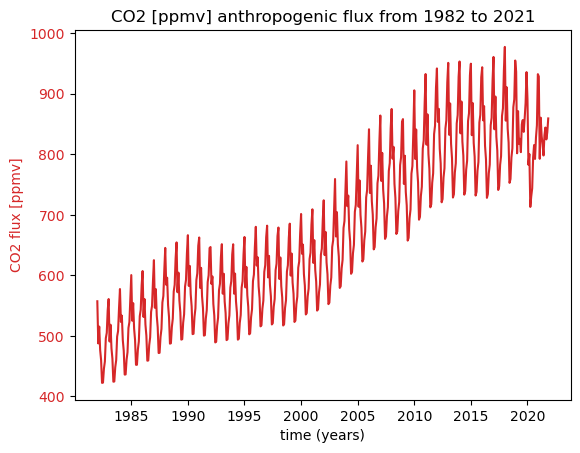

In [48]:
time=np.arange(1982,2022,1/12)
time=time[0:time.size-1]
CO2=CO2[0:CO2.size-1]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (years)')
ax1.set_ylabel('CO2 flux [ppmv]', color=color)
ax1.set_title('CO2 [ppmv] anthropogenic flux from 1982 to 2021')
ax1.plot(time, CO2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

In [35]:
#apro 2° ds di CO2 flusso antropico per mese di ogni mese dal 1982 al 2021 e plotto grafico media spaziale ITALIA
path= "./CO2flux/cams73_latest_co2_flux_surface_mm_{}.nc"
CO2=np.zeros([480,1])

i=198201
j=0
while i<198312:
    ds=xr.open_dataset(path.format(i))
    #apply function to lingitudinally shift
    ds = ds_swaplon(ds)
    #define reference system of ds
    ds.rio.write_crs("epsg:4326", inplace=True)
    #import shapefile and define reference system of shp
    shapefile = geopandas.read_file('./italy_shapefile/italy_shapefile.shp', crs="epsg:4326")
    #clipping
    ds_clip = ds.rio.clip(shapefile.geometry.apply(mapping), shapefile.crs, drop=True)
    da=ds_clip.flux_foss
    mon=np.average(np.array(da))
    CO2[j]=mon
    if (i+1-13) % 100==0:
        i=i+89
    else:
        i=i+1
    j=j+1

CO2=CO2*28.97 / 44.01 * 1e6
CO2

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [53]:
#apro 2° ds di CO2 flusso antropico per mese di ogni mese dal 1982 al 2021 e plotto grafico media spaziale ITALIA media annual edi tutti i mesi
path= "./CO2flux/cams73_latest_co2_flux_surface_mm_{}.nc"
CO2=np.zeros([480,1])
k=0
i=198201
j=0
while i<199012:
    ds=xr.open_dataset(path.format(i))
    #apply function to lingitudinally shift
    ds = ds_swaplon(ds)
    #define reference system of ds
    ds.rio.write_crs("epsg:4326", inplace=True)
    #import shapefile and define reference system of shp
    shapefile = geopandas.read_file('./italy_shapefile/italy_shapefile.shp', crs="epsg:4326")
    #clipping
    ds_clip = ds.rio.clip(shapefile.geometry.apply(mapping), shapefile.crs, drop=True)
    da=ds_clip.flux_foss
    av=np.average(np.array(da))
    if (i+1-13) % 100==0:
        i=i+89
        CO2[j]=k
        k=0
    else:
        i=i+1
        k=k+av
    j=j+1

CO2=CO2*28.97 / 44.01 * 1e6
CO2

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [nan],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [nan],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [nan],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [nan],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [nan],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [52]:
#apro 2° ds di CO2 flusso antropico per mese di ogni mese dal 1982 al 2021 e plotto grafico media spaziale ITALIA media annual edi tutti i mesi
#PIU VELOCE DI QUELLO PRIMA
path= "./CO2flux/cams73_latest_co2_flux_surface_mm_{}.nc"
CO2=np.zeros([480,1])
k=0
i=198201
j=0
ds=xr.open_dataset(path.format(i))
#apply function to lingitudinally shift
ds = ds_swaplon(ds)
k=ds.flux_foss*0

while i<198312:
    ds=xr.open_dataset(path.format(i))
    #apply function to lingitudinally shift
    ds = ds_swaplon(ds)
    da=ds.flux_foss
    if (i+1-13) % 100==0:
        i=i+89
        k=k/12
        k.rio.write_crs("epsg:4326", inplace=True)
        #import shapefile and define reference system of shp
        shapefile = geopandas.read_file('./italy_shapefile/italy_shapefile.shp', crs="epsg:4326")
        #clipping
        k_clip = k.rio.clip(shapefile.geometry.apply(mapping), shapefile.crs, drop=True)
        av=np.average(np.array(k_clip))
        CO2[j]=av
        
        k=ds.flux_foss*0
    else:
        i=i+1
        k=k+da
    j=j+1

CO2=CO2*28.97 / 44.01 * 1e6
CO2

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [nan],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

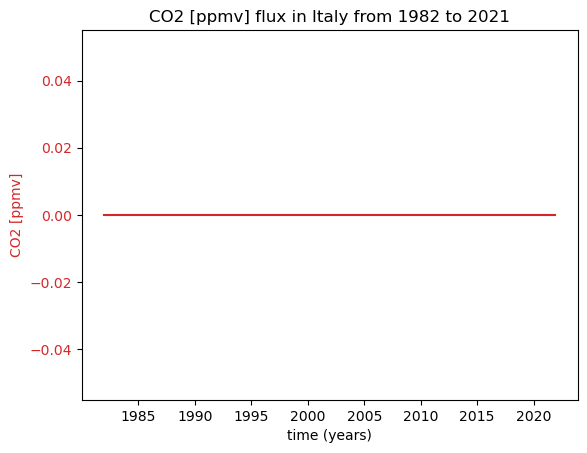

In [54]:
time=np.arange(1982,2022,1/12)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (years)')
ax1.set_ylabel('CO2 [ppmv]', color=color)
ax1.set_title('CO2 [ppmv] flux in Italy from 1982 to 2021')
ax1.plot(time, CO2, color=color)
ax1.tick_params(axis='y', labelcolor=color)